# My enzyme notebook

Task 1: Find a better title ;-)

Task 2: Go through the notebook and make it complete/fill in the code and run it.

***Rewrite the text cells to make this notebook "your own". The better written, the more easy for you to read, understand, and remember.***

## Part 1: Programmatic access to the QuickGo database

Ok, let's get started. Load these packages, we need them later:

In [12]:
library(httr)
library(jsonlite)
library(xml2)

Load the csv file called `uniprot-goa-enzyme.csv` using the function `read.csv()`.
Check the documentation to find out how you set the separators to the tab-sign `"\t"` (hint: use `?read.csv()`). <br>
Save the loaded data in a dataframe called `enzymedf` and check if it looks like you would expect.

In [13]:
?read.csv()

read.table {utils},R Documentation
file,"the name of the file which the data are to be read from. Each row of the table appears as one line of the file. If it does not contain an absolute path, the file name is relative to the current working directory, getwd(). Tilde-expansion is performed where supported. This can be a compressed file (see file). Alternatively, file can be a readable text-mode connection (which will be opened for reading if necessary, and if so closed (and hence destroyed) at the end of the function call). (If stdin() is used, the prompts for lines may be somewhat confusing. Terminate input with a blank line or an EOF signal, Ctrl-D on Unix and Ctrl-Z on Windows. Any pushback on stdin() will be cleared before return.) file can also be a complete URL. (For the supported URL schemes, see the ‘URLs’ section of the help for url.)"
header,"a logical value indicating whether the file contains the names of the variables as its first line. If missing, the value is determined from the file format: header is set to TRUE if and only if the first row contains one fewer field than the number of columns."
sep,"the field separator character. Values on each line of the file are separated by this character. If sep = """" (the default for read.table) the separator is ‘white space’, that is one or more spaces, tabs, newlines or carriage returns."
quote,"the set of quoting characters. To disable quoting altogether, use quote = """". See scan for the behaviour on quotes embedded in quotes. Quoting is only considered for columns read as character, which is all of them unless colClasses is specified."
dec,the character used in the file for decimal points.
numerals,"string indicating how to convert numbers whose conversion to double precision would lose accuracy, see type.convert. Can be abbreviated. (Applies also to complex-number inputs.)"
row.names,"a vector of row names. This can be a vector giving the actual row names, or a single number giving the column of the table which contains the row names, or character string giving the name of the table column containing the row names. If there is a header and the first row contains one fewer field than the number of columns, the first column in the input is used for the row names. Otherwise if row.names is missing, the rows are numbered. Using row.names = NULL forces row numbering. Missing or NULL row.names generate row names that are considered to be ‘automatic’ (and not preserved by as.matrix)."
col.names,"a vector of optional names for the variables. The default is to use ""V"" followed by the column number."
as.is,"controls conversion of character variables (insofar as they are not converted to logical, numeric or complex) to factors, if not otherwise specified by colClasses. Its value is either a vector of logicals (values are recycled if necessary), or a vector of numeric or character indices which specify which columns should not be converted to factors. Note: to suppress all conversions including those of numeric columns, set colClasses = ""character"". Note that as.is is specified per column (not per variable) and so includes the column of row names (if any) and any columns to be skipped."
tryLogical,"a logical determining if columns consisting entirely of ""F"", ""T"", ""FALSE"", and ""TRUE"" should be converted to logical; passed to type.convert, true by default."


In [15]:
enzymedf <- read.csv('/Users/sonchaelin/Desktop/🇩🇪/Introduction to Computational Biology/Project/uniprot-goa-enzyme.csv', header = TRUE, sep = '\t')
head(enzymedf)

,Entry,Entry.name,Status,Gene.names,Organism,Length
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,O00762,UBE2C_HUMAN,reviewed,UBE2C UBCH10,Homo sapiens (Human),179
2,O14508,SOCS2_HUMAN,reviewed,SOCS2 CIS2 SSI2 STATI2,Homo sapiens (Human),198
3,O14933,UB2L6_HUMAN,reviewed,UBE2L6 UBCH8,Homo sapiens (Human),153
4,O15145,ARPC3_HUMAN,reviewed,ARPC3 ARC21,Homo sapiens (Human),178
5,O15392,BIRC5_HUMAN,reviewed,BIRC5 API4 IAP4,Homo sapiens (Human),142
6,O15511,ARPC5_HUMAN,reviewed,ARPC5 ARC16,Homo sapiens (Human),151


*Decide for one of the 135 enzymes from the `enzymedf` that you would like to work on during this course. Go to <https://seafile.cloud.uni-hannover.de/f/c4c734eac5c541348cab/> and check that nobody else decided for the same enzyme, then put your name in the list and add the number and entry name of your enzyme.* <br>

Save the number (index of the row in the `enzymedf` dataframe) of your chosen enzyme in a variable called `myenzyme`.

In [16]:
myentry <- enzymedf$Entry
myname <- enzymedf$Entry.name
mylength <- enzymedf$Length

Use `myenzyme` to get the UniProt ID (Entry), the name (Entry.name), and the length (Length) of your enzyme. Save the information in `myentry`, `myname`, and `mylength`, respectively.

*Hint: Remember that you address a certain column of a dataframe by using the `$` sign, e.g. `enzymedf$Entry`.* <br>
*Hint: Check <https://rspatial.org/intr/4-indexing.html> to learn how to use `[]` to get a particular element of a dataframe (or list, or vector...).*

In [17]:
myenzyme <- 5 # 원하는 enzyme 번호로 수정
myentry <- enzymedf$Entry[myenzyme]
myname <- enzymedf$Entry.name[myenzyme]
mylength <- enzymedf$Length[myenzyme]

Print a statement that informs the reader/user about the ID, name and length of the enzyme you chose.

In [18]:
cat("Selected enzyme:\nID:", myentry, "\nName:", myname, "\nLength:", mylength, "\n")

Selected enzyme:
ID: O15392 
Name: BIRC5_HUMAN 
Length: 142 


The next task consists of several steps. The goal is to generate a dataframe called `GOdf` that contains all Gene Ontology (GO) terms that your enzyme is associated with. Because these can be quite many, creating this dataframe manually would be too time consuming. <br>
Instead, we make use of **programmatic access** to the QuickGO database to download all relevant GO terms at once.

**You can either try to solve this task by yourself. In this case, check this page to get some help:**
<https://www.ebi.ac.uk/QuickGO/api/index.html#!/annotations/downloadLookupUsingGET> <br>
(Scroll down a bit until you get to "annotations".)

***Alternatively***, let me guide you through the individual steps:

 1. First, generate a request URL that fits your enzyme. To do so, combine the string `'https://www.ebi.ac.uk/QuickGO/services/annotation/downloadSearch?includeFields=goName&selectedFields=goId&selectedFields=goAspect&selectedFields=goName&geneProductId='` with the UniProt ID of your enzyme (`myentry`) using the function `paste0()`. <br>
 Store the generated URL in a variable called `myrequestURL`.

In [23]:
myrequestURL <- paste0(
  "https://www.ebi.ac.uk/QuickGO/services/annotation/downloadSearch?",
  "includeFields=goName&selectedFields=goId&selectedFields=goAspect&selectedFields=goName&geneProductId=",
  myentry
)

 2. Next, get the required information from the database using the command `GET(myrequestURL, accept("text/tsv"))`. Store the response in a variable called `r`. Check if everything went OK by using the command `stop_for_status(r)` (if everything is ok, nothing will happen; if something goes wrong, an error message will turn up). 


In [24]:
r <- GET(myrequestURL, accept("text/tsv"))
stop_for_status(r)
mycontent <- content(r, as = "text")

 3. Lastly, extract the content of that we need by using the function `content(r,as = "text")` and store it in a variable called `mycontent`. Have a look at `mycontent` to see if you got a long line of text. In addition, also have a look at `r` and see how it differs from `mycontent`.

In [25]:
GOdf <- read.table(text = mycontent, sep = "\t", header = TRUE)

Now we are ready to generate the dataframe `GOdf` containing all GO terms that are associated to your enzyme.
- Use the function `read.table()` with the parameters `text = mycontent`, `sep = "\t"`, and `header = TRUE` to turn the long line of text (`mycontent`) into a dataframe that you store in a variable called `GOdf`. 
- Try to find out what the parameters mean and take notes for yourself so you will later remember why you were using these settings.
- Take a look at `GOdf`.

In [26]:
GOdf <- unique(GOdf)

You may find that some rows of `GOdf` appear multiple times. To get rid of these "duplicates", use the function `unique(GOdf)` and store the result again in `GOdf`. Does the dataframe look different now?

In [28]:
print(head(GOdf))

      GO.TERM GO.ASPECT                                        GO.NAME
1  GO:0004869         F cysteine-type endopeptidase inhibitor activity
2  GO:0005515         F                                protein binding
56 GO:0008017         F                            microtubule binding
57 GO:0019899         F                                 enzyme binding
58 GO:0030414         F                   peptidase inhibitor activity
59 GO:0031267         F                           small GTPase binding


You probably noticed that `GOdf` consists of four columns: index, GO.TERM, GO.ASPECT, and GO.NAME. <br>
GO.TERM contains the official ID of the GO term, GO.ASPECT is the category that a GO term belongs to *(find out which are the three different categories: C =... , P =..., F =... )* and GO.NAME is the human readable version of the GO term (i.e., it's meaning).

Order `GOdf` by the column `GO.ASPECT` or by the column `GO.TERM` using the function `order()`. This website could provide some hints how to do it: <https://www.statmethods.net/management/sorting.html>

In [29]:
GOdf <- GOdf[order(GOdf$GO.ASPECT, GOdf$GO.TERM), ]

In [30]:
myGOterm <- GOdf$GO.TERM[1]
cat("Selected GO Term:", myGOterm, "\n")

Selected GO Term: GO:0000228 


Now pick a GO term you find interesting and store it in a variable called `myGOterm`. <br>
Have a look at `myGOterm` to check if it worked out.

In [32]:
myGOchartURL <- paste0(
  "https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/",
  myGOterm, "/chart?ids=", myGOterm
)

Now we want to get the GO chart of your chosen GO term to see how it is connected to other GO terms. Luckily, the QuickGo database provides the chart for us, we just need to download it. <br>
First, generate the URL that leads to the GO graph of your GO term.

**You may figure it out yourself starting here:** <https://www.ebi.ac.uk/QuickGO/api/index.html#!/gene_ontology/getChartUsingGET_1> <br>
*Note: replacing `{` and `}` by `%7B` and `%7D` in the URL can help to avoid problems.*

***Alternatively***, use the `paste0()` function to combine the URL `'https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/%7Bids%7D/chart?ids='` and your variable `myGOterm`. Save the output in a variable called `myGOchartURL`.

In [33]:
download.file(myGOchartURL, "myGOchart.png", mode = "wb")

Finally, download the chart using `download.file(myGOchartURL,'myGOchart.png', mode = 'wb')`. Figure out the meaning of the three parameters in the `download.file()` function and take notes.

In [34]:
cat("![GO Chart](myGOchart.png)")

![GO Chart](myGOchart.png)

Finally, use markdown to display `myGOchart.png`. Have a look at the chart and see how different GO terms are connected. You can now try another GO term, run the last cells again and see if the chart looks differently. 

![](myGOchart.png)

# My enzyme notebook

## Part 2: Using Cytoscape from within R

1. Install Cytoscape
1. Start Cytoscape
1. Follow [this](https://bioconductor.org/packages/release/bioc/vignettes/RCy3/inst/doc/Overview-of-RCy3.html) instruction to learn how to call Cytoscape from within your notebook using the `RCy3` package:
- Installation
    - **Windows users**: See "Linux/Mac users" and try that approach first. If it does not work, install `RCy3` as described in the tutorial. <br>
    - **Linux/Mac users**: Please do NOT install the package from within R. Instead use your package manager (mamba) - make sure to install the package to the correct environment (`mamba activate ...`). This is the required mamba command:<br>
 `mamba install -c bioconda bioconductor-rcy3`
- Prerequisites
- Getting started
- My first network
- Switch styles
- Saving and export
- Saving high resolution image files


4. Add comments to your notebook that explain what the individual steps are doing. 

In [1]:
library(RCy3)

This is how I start...

In [2]:
# Getting started
cytoscapePing()
cytoscapeVersionInfo()

You are connected to Cytoscape!



apiVersion cytoscapeVersion 
            "v1"         "3.10.3"

Yet another comment...

In [3]:
# My first network
nodes <- data.frame(id = c("A", "B", "C", "D"), name = c("Node A", "Node B", "Node C", "Node D"), stringsAsFactors = FALSE)
edges <- data.frame(source = c("A", "A", "B", "C"), target = c("B", "C", "D", "D"), interaction = "interacts", stringsAsFactors = FALSE)
createNetworkFromDataFrames(nodes, edges, title = "My First Network", collection = "My Collection")

Loading data...


Applying default style...


Applying preferred layout...




networkSUID 
        128

In [ ]:
install.packages("marquee")

In [4]:
# Switch styles
setVisualStyle("Marquee")

message 
"Visual Style applied."

In [5]:
# Saving
saveSession("my_first_network_session")

In [6]:
# Saving high resolution image files
# Saving high resolution image files
exportImage("my_first_network", "PDF")
exportImage("my_first_network", "PNG")

file 
"/Users/sonchaelin/CytoscapeConfiguration/filetransfer/default_sandbox/my_first_network.pdf"

file 
"/Users/sonchaelin/CytoscapeConfiguration/filetransfer/default_sandbox/my_first_network.png"

5. Now display the network graph image you just created in your notebook (using markdown).

In [9]:
library(png)

In [45]:
network <- readPNG("/Users/sonchaelin/CytoscapeConfiguration/filetransfer/default_sandbox/my_first_network.png")

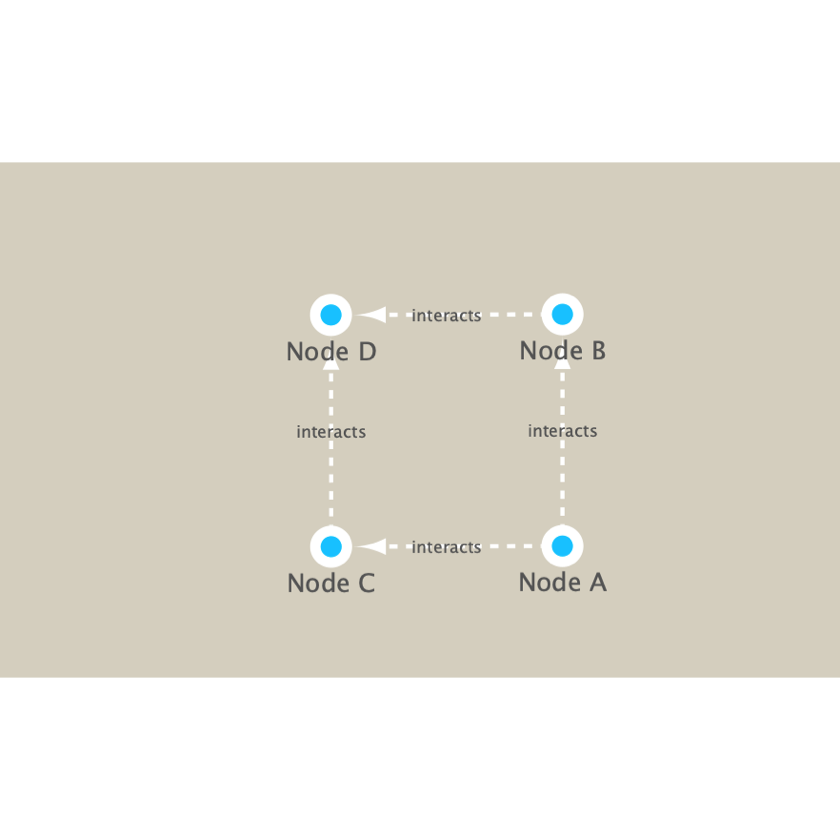

In [46]:
grid::grid.raster(network)

### Programmatic access to IntAct

1. For this part, we will need the package `jsonlite`. **If the package should not be already installed,** check [here](https://anaconda.org/r/r-jsonlite) to find out how to install it using mamba (attention: we use mamba instead of conda) and your command line tool. Remember: Always first activate the correct environment, then install a new package. You might need to stop Jupyter notebook before installation and reopen it afterwards. To use the package in your notebook use the command `library(jsonlite)`. <br>
<br>
1. Find out how to access the database IntAct programmatically.
Query the IntAct database for your chosen enzyme using the previously defined variable `myentry`.<br>

Hint: Search [here](https://www.ebi.ac.uk/intact/documentation/technical_corner#apis) to find out which URL we need (warning, the last time I checked the website it was not very well documented). <br>
Call the URL using the function `fromJSON()` from the `jsonlite` package and store the response in `rIntAct`; save the information from the columns `idA` and `idB` as a dataframe in a variable called `IntActdf` (keep the same column names).

***More detailed hints*** <br>
We use a similar approach as above when we accessed the QuickGo database. This time, we want to send a query to the IntAct database and the response will not be a txt but a json file.
<br>
<br>
As above, we need to create a URL for our query. This URL consists of three parts: the general part, the entry of your enzyme and additional parameters to restrict the response to Homo-sapiens related results. To create the URL, combine these three parts:
1. 'https://www.ebi.ac.uk/intact/ws/interaction/findInteractions/'
2. `myentry`
3. '?interactorSpeciesFilter=Homo%20sapiens'

Save the URL in a variable called `myrequestURLIntACT`. Now follow these steps to get the reuired information from the IntAct database:
1. Use the function `fromJSON(myrequestURLIntACT)` from the `jsonlite` package and put the result in a new variable called `rIntAct`. Have a look at `rIntAct`.
2. Take the column `$content` from `rIntAct` and store it in a variable called `mycontentIntAct`.
3. Then, use the function `data.frame()` to take the two columns `idA` and `idB` from `mycontentIntAct` and save them as a new dataframe in a variable called `IntActdf`. Make sure that columns of `IntActdf` are also called `idA` and `idB`.

In [18]:
library(jsonlite)
myentry <- "P12345" 
myrequestURLIntACT <- paste0('https://www.ebi.ac.uk/intact/ws/interaction/findInteractions/', myentry, '?interactorSpeciesFilter=Homo%20sapiens')
rIntAct <- fromJSON(myrequestURLIntACT)
mycontentIntAct <- rIntAct$content
IntActdf <- read.delim("/Users/sonchaelin/Desktop/ /🇩🇪/Introduction to Computational Biology/Project/uniprot-goa-enzyme.csv",
                       sep = "\t",
                       header = TRUE,
                       stringsAsFactors = FALSE)
head(IntActdf)

,Entry,Entry.name,Status,Gene.names,Organism,Length
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,O00762,UBE2C_HUMAN,reviewed,UBE2C UBCH10,Homo sapiens (Human),179
2,O14508,SOCS2_HUMAN,reviewed,SOCS2 CIS2 SSI2 STATI2,Homo sapiens (Human),198
3,O14933,UB2L6_HUMAN,reviewed,UBE2L6 UBCH8,Homo sapiens (Human),153
4,O15145,ARPC3_HUMAN,reviewed,ARPC3 ARC21,Homo sapiens (Human),178
5,O15392,BIRC5_HUMAN,reviewed,BIRC5 API4 IAP4,Homo sapiens (Human),142
6,O15511,ARPC5_HUMAN,reviewed,ARPC5 ARC16,Homo sapiens (Human),151


Load the library `stringr`. 

Use its function `str_remove` to clean your data and remove the strings "(uniprotkb)" and "(dip)" from every entry in `IntActdf`. The final list should contain only protein IDs like 'O94874', 'P51668' and so on.
Store this list in a variable called `IntActls`.

Hint: Use the function `apply()` to apply `str_remove` to all elements of `IntActdf`.

Have a look at `IntActls`.

***More detailed hints*** <br>
Call `?apply()` to inform yourself how the `apply()` function is used. Here:
- `X` is your dataframe `IntActdf`
- `MARGIN` is `2`... `c(1,2)` works as well but `1` is a less favorable choice - try it out!
- `FUN`is the function you are supposed to use remove the unwanted string
- `...` here goes the pattern that should be removed: `pattern = "..."`
- constructing the right pattern is the most tricky part. Try it out: What happens if you use `pattern = "uniprotkb"`? Or `pattern = "(uniprotkb)"`? If you want to get rid of the brackets, use `\\(` instead of just `(`. If you want to combine two expressions, use `|` between both.

In [19]:
library(stringr)
IntActls <- apply(IntActdf, 2, str_remove, pattern = "\\(uniprotkb\\)|\\(dip\\)")
head(IntActls)

Entry,Entry.name,Status,Gene.names,Organism,Length
O00762,UBE2C_HUMAN,reviewed,UBE2C UBCH10,Homo sapiens (Human),179
O14508,SOCS2_HUMAN,reviewed,SOCS2 CIS2 SSI2 STATI2,Homo sapiens (Human),198
O14933,UB2L6_HUMAN,reviewed,UBE2L6 UBCH8,Homo sapiens (Human),153
O15145,ARPC3_HUMAN,reviewed,ARPC3 ARC21,Homo sapiens (Human),178
O15392,BIRC5_HUMAN,reviewed,BIRC5 API4 IAP4,Homo sapiens (Human),142
O15511,ARPC5_HUMAN,reviewed,ARPC5 ARC16,Homo sapiens (Human),151


*Note: The function `apply()` returns a list, not a dataframe. For our purpose this is perfect, as you will see later. However, in other applications it might be important to get back a dataframe. If that's the case, simply turn the list into a dataframe by using `data.frame(apply(...))`.*

### Combining IntAct and Cytoscape to create a network figure

Find out how to access the first column of `IntActls` and have a look at it.

In [20]:
first_column <- IntActls[1]
head(first_column)

[1] "O00762"

Find out how to create a (one-dimensional) vector that contains all elements of `IntActls`. In other words: Take both columns of `IntActls` and put them together into a vector, one after the other. Call this vector `mynodes`.

In [21]:
mynodes <- unlist(IntActls, use.names = FALSE)
head(mynodes)

Entry,Entry.name,Status,Gene.names,Organism,Length
O00762,UBE2C_HUMAN,reviewed,UBE2C UBCH10,Homo sapiens (Human),179
O14508,SOCS2_HUMAN,reviewed,SOCS2 CIS2 SSI2 STATI2,Homo sapiens (Human),198
O14933,UB2L6_HUMAN,reviewed,UBE2L6 UBCH8,Homo sapiens (Human),153
O15145,ARPC3_HUMAN,reviewed,ARPC3 ARC21,Homo sapiens (Human),178
O15392,BIRC5_HUMAN,reviewed,BIRC5 API4 IAP4,Homo sapiens (Human),142
O15511,ARPC5_HUMAN,reviewed,ARPC5 ARC16,Homo sapiens (Human),151


Create a vector that contains only the first column of `IntActls`. Call it `mysource`.

Then, create a vector that contains only the second column of `IntActls`. Call it `mytarget`.

In [22]:
if (is.vector(IntActls)) {
  n <- length(IntActls) / 2
  mysource <- IntActls[1:n]
  mytarget <- IntActls[(n+1):(2*n)]
} else if (is.list(IntActls)) {
  mysource <- IntActls[[1]]
  mytarget <- IntActls[[2]]
} else if (is.matrix(IntActls)) {
  mysource <- IntActls[,1]
  mytarget <- IntActls[,2]
} else {
  stop("Unsupported IntActls structure")
}

Create nodes and edges dataframes for a Cytoscape network (as you did in the introductory example). Use the vectors `mynodes`, `mysource`, and `mytarget` for the columns `id`, `source`, and `target`, respectively.
Call the nodes dataframe `nodesIntActdf` and the edges dataframe `edgesIntActdf`.

Have a look at both dataframes.

In [23]:
edgesIntActdf <- data.frame(
  source = mysource,
  target = mytarget,
  stringsAsFactors = FALSE
)

In [24]:
nodesIntActdf <- data.frame(
  id = unique(c(edgesIntActdf$source, edgesIntActdf$target)),
  stringsAsFactors = FALSE
)

In [25]:
head(nodesIntActdf)
head(edgesIntActdf)

,id
,<chr>
1,O00762
2,O14508
3,O14933
4,O15145
5,O15392
6,O15511


,source,target
,<chr>,<chr>
1,O00762,UBE2C_HUMAN
2,O14508,SOCS2_HUMAN
3,O14933,UB2L6_HUMAN
4,O15145,ARPC3_HUMAN
5,O15392,BIRC5_HUMAN
6,O15511,ARPC5_HUMAN


Create a Cytoscape network using `nodesIntActdf` and `edgesIntActdf`. Give it a title (for example "my enzyme network") and name the Cytoscape collection (for example "My Enzyme collection").

In [26]:
createNetworkFromDataFrames(nodesIntActdf, edgesIntActdf, title = "my enzyme network", collection = "My Enzyme collection")

Loading data...


Applying default style...


Applying preferred layout...




networkSUID 
        277

Change the visual style of your network to "Marquee".

In [27]:
setVisualStyle("Marquee")

message 
"Visual Style applied."

Save your Cytoscape session (for example under the name "myenzyme_session").

In [28]:
saveSession("myenzyme_session")

Create a PDF file and a PNG image from your network (as you did above for introductory example). Call the files for example "myenzyme_image".

In [29]:
exportImage("myenzyme_image", "PDF")
exportImage("myenzyme_image", "PNG")

file 
"/Users/sonchaelin/CytoscapeConfiguration/filetransfer/default_sandbox/myenzyme_image.pdf"

file 
"/Users/sonchaelin/CytoscapeConfiguration/filetransfer/default_sandbox/myenzyme_image.png"

Display your enzyme network image (PNG) here in the notebook.

In [38]:
enzyme <- readPNG("/Users/sonchaelin/CytoscapeConfiguration/filetransfer/default_sandbox/myenzyme_image.png")

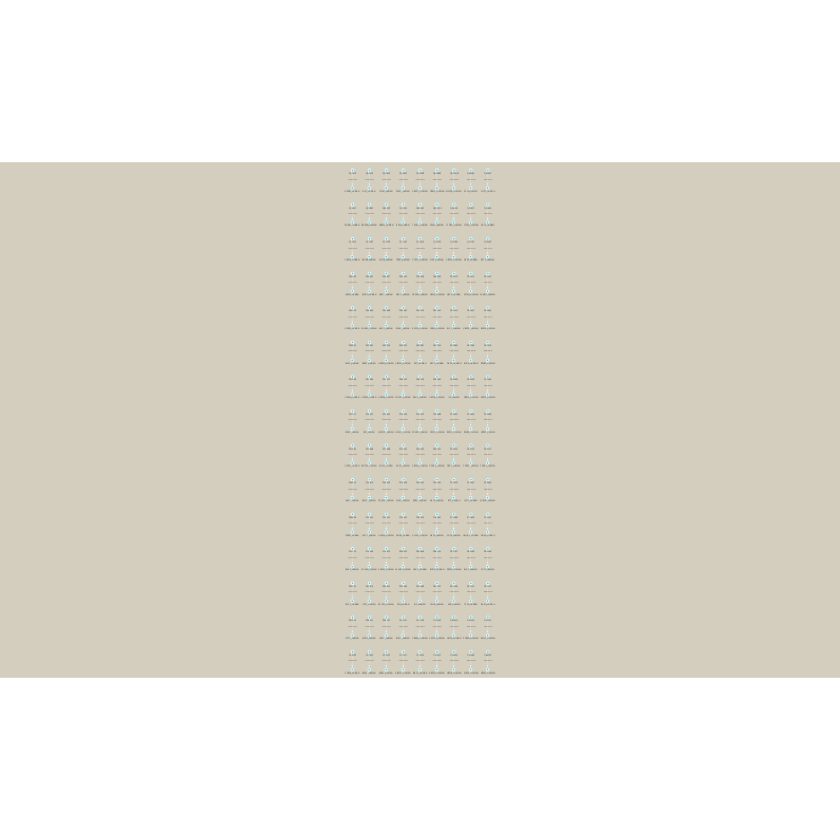

In [39]:
grid::grid.raster(enzyme)

# My enzyme notebook

## Part 3: Burrows-Wheeler transform (BWT) and FM-indexing

Take the test sequence `acaacg`, add the "end-of-string character" `'$'`, and store it in a variable called `referencesequence`.

*Alternative (try out after you finished Part 3 with the test sequence): Find the nucleotide sequence of your enzyme and copy-paste it into the variable called `referencesequence` (add the "end-of-string character" `'$'` to the sequence).

*More challenging alternative:
Find out the Ensemble ID of your enzyme (based on its UniProt ID): <https://www.uniprot.org/id-mapping/> <br>
Use the REST API of the Ensembl database to download the sequence automatically. Try this link to see how it works and adjust it to query about your enzyme:
<http://rest.ensembl.org/sequence/id/ENSG00000072401?content-type=text/plain> <br>
General info: <http://rest.ensembl.org/>

*Even more challenging: Automatize the mapping from UniProt ID to Ensembl ID (via REST API).

In [1]:
referencesequence <- "acaacg$"

Compute the BWT of the sequence and save it in `mybwt`.

*Hints:* 
- Define a function called `computebwt` that takes `referencesequence` as an input parameter using <br>
        `computebwt <- function(referencesequence){
        ...
        }`
- Within `computebwt`:
    - use a `for` loop to construct a vector called `bwtmatrix` containing all possible cyclic shifts of `referencesequence` [extra points when you avoid the `for` loop and find a way to use `lapply()` instead ;-)]
    - order the entries of `bwtmatrix`
    - extract the last character from each entry in the ordered `bwtmatrix` and save the resulting list of characters in a variable called `bwt`
    - use `return(bwt)` to return the final BWT 
    
- call `computebwt(referencesequence)` to compute the BWT and store it in `mybwt`
- check your function `computebwt`: compute the BWT of `acaacg$` and check if the output is `'gc$aaac'`


*Potentially useful reminders:*
- `vector()` generates an empty vector
- `nchar()` determines the length of the string (number of characters)
- `substr(x, start, stop)` creates a substring of string `x`, check `?substr` for more details
- `c(a,b)` concatenates the vectors `a` and `b`
- `paste0(a,b)`combines two strings `a` and `b`; using the empty argument `collapse = ''` could be useful
- `lapply(X, FUN, ...)` applies the function `FUN` to all elements of a vector (list) `X`
- `mymatrix[order(mymatrix)]` orders the rows of `mymatrix`



In [2]:
computebwt <- function(referencesequence){
  n <- nchar(referencesequence)
  bwtmatrix <- sapply(0:(n-1), function(i) {
    paste0(
      substr(referencesequence, n-i+1, n),
      substr(referencesequence, 1, n-i)
    )
  })
  bwtmatrix <- sort(bwtmatrix)
  bwt <- sapply(bwtmatrix, function(x) substr(x, nchar(x), nchar(x)))
  return(paste(bwt, collapse=""))
}
mybwt <- computebwt(referencesequence)
mybwt  

[1] "gc$aaac"

Define a function `lastfirst` that takes the arguments `position` and `letter` and computes the last-first mapping based on `mybwt`.

*Hints*: <br>
- Take care: In R, **indices are counted from 1** (not from 0).
- First, create a function that returns the first row of the BWT matrix. Hint: You could simply copy the function `computebwt`, adjust it to make it return the first (instead of the last) column and call it `computefirst`.
- Call `computefirst(referencesequence)` and store the result in a variable called `myfirstcol`.

- Second, define the function `count`: <br> 
The function should take `letter` as a variable. In addition, it needs to "know" the first column of the BWT matrix: <br>
        `count  <- function(letter, text = myfirstcol){
        ...
        }`<br>
You might want to use the function `regexpr`. Check `?regexpr` and try it out to find out what it does.

- Third, define the function `occ`: <br>
The function takes `letter` and `position` as variables and needs to "know" the Burrows-Wheeler transform `mybwt`. Consider using the functions `str_count` (from the `stringr` package) and `substr` **to count all occurences of a `letter` in the BWT `mybwt` from 1 to `position - 1`**.
- Fourth, define the function `lastfirst`: <br>
Remember that the last-to-first mapping is constructed by taking the sum of the `count` function and the `occ` function. The function `lastfirst` takes two arguments, `letter` and `position`, and returns a new position.

Keep in mind that the letters that can occur are `'a'`, `'c'`, `'t'`,`'g'`, and `'\\$'` (or `'A'`, `'C'`, `'T'`,`'G'`, and `'\\$'`). 

In [3]:
computefirst <- function(referencesequence){
  n <- nchar(referencesequence)
  bwtmatrix <- sapply(0:(n-1), function(i) {
    paste0(
      substr(referencesequence, n-i+1, n),
      substr(referencesequence, 1, n-i)
    )
  })
  bwtmatrix <- sort(bwtmatrix)
  firstcol <- sapply(bwtmatrix, function(x) substr(x, 1, 1))
  return(paste(firstcol, collapse=""))
}
myfirstcol <- computefirst(referencesequence)
myfirstcol

[1] "$aaaccg"

Use `mybwt` and `lastfirst(letter,position)` to find out how often the read sequence `read  <- 'aac'` appears in your `referencesequence`.

*Hint*: Compute the reverse of `read` and store it in a variable called `inverseread` (search online for hints on computing reversed strings). Define two variables `top` (initiate with 1) and `bottom` (initiate with `nchar(mybwt) + 1`) and iteratively update both using `lastfirst(letter,top)` and `lastfirst(letter,bottom)`, where `letter` takes one character after the other of `inverseread`.  

In [4]:
count <- function(letter, text = myfirstcol){
  sum(strsplit(text, "")[[1]] == letter)
}
occ <- function(letter, position, mybwt){
  sum(strsplit(substr(mybwt, 1, position-1), "")[[1]] == letter)
}
lastfirst <- function(position, letter){
  count(letter) + occ(letter, position, mybwt)
}

*Rewrite the function `computebwt` so that it also returns a vector `positionmapping` that allows to map row numbers in the BW matrix to positions in the original `referencesequence`. Use `positionmapping` to find out where the read that is indexed by `top` is located in `referencesequence` and store the result in `topread`. <br>

*Hint: Create `positionmapping` within the function `computebwt` and  instead of `return(bwt)` use `return(list("bwt" = bwt,"positionmapping" = positionmapping))`.*

In [5]:
computebwt <- function(referencesequence){
  n <- nchar(referencesequence)
  bwtmatrix <- sapply(0:(n-1), function(i) {
    paste0(
      substr(referencesequence, n-i+1, n),
      substr(referencesequence, 1, n-i)
    )
  })
  bwtmatrix_sorted <- sort(bwtmatrix)
  bwt <- sapply(bwtmatrix_sorted, function(x) substr(x, nchar(x), nchar(x)))
  positionmapping <- order(bwtmatrix)
  return(list("bwt" = paste(bwt, collapse=""), "positionmapping" = positionmapping))
}
result <- computebwt(referencesequence)
mybwt <- result$bwt
positionmapping <- result$positionmapping

*From position `topread` to `topread + 2` you should find the read `'aac'` in the test sequence. Use the function `substr` to check that.

In [6]:
top <- 1
topread <- positionmapping[top]
substr(referencesequence, topread, topread + 2) == "aac"

[1] FALSE